## MUSHROOM DATASET
Classify the mushrooms as poisonous or edible
1. cap-shape:                 bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface:               fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color:                 brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises:                   bruises=t,no=f
5. odor:                      almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
6. gill-attachment:           attached=a,descending=d,free=f,notched=n
7. gill-spacing:              close=c,crowded=w,distant=d
8. gill-size:                 broad=b,narrow=n
9. gill-color:                black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape:              enlarging=e,tapering=t
11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type:                partial=p,universal=u
17. veil-color:               brown=n,orange=o,white=w,yellow=y
18. ring-number:              none=n,one=o,two=t
19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population:               abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [153]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [154]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [155]:
headers = ["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring" ,'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color', 'ring-number', 'ring-type', "spore-print-color", "population", "habitat"]
df.columns = headers
df.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [157]:
for col in df.columns:
    df[col] = df[col].astype("str")
    print(df[col].value_counts(),'\n\n')

e    4208
p    3916
Name: class, dtype: int64 


x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 


f    4748
t    3376
Name: bruises, dtype: int64 


n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


f    7914
a     210
Name: gill-attachment, dtype: int64 


c    6812
w    1312
Name: gill-spacing, dtype: int64 


b    5612
n    2512
Name: gill-size, dtype: int64 


b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


t    4608
e    3516
Name: stalk-shape, dtype: int64 


b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64 


s    5176
k    2372


In [158]:
# df.replace('?',np.nan,inplace=True)

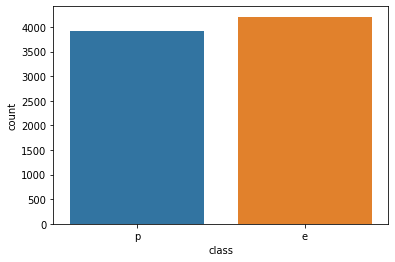

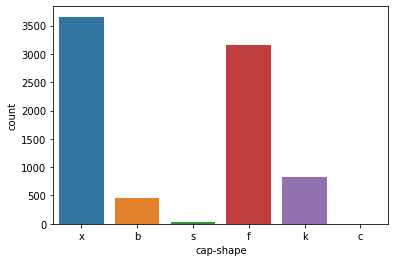

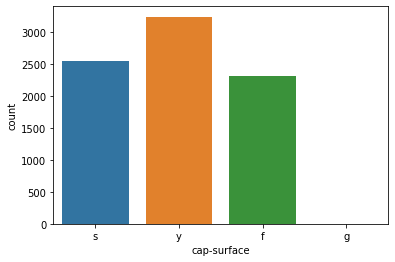

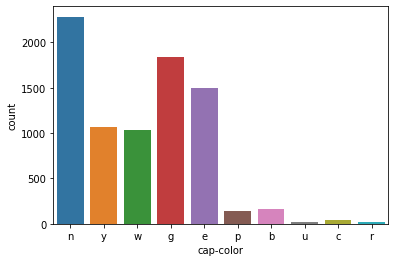

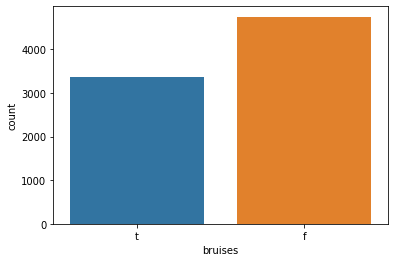

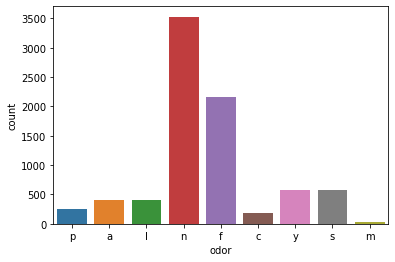

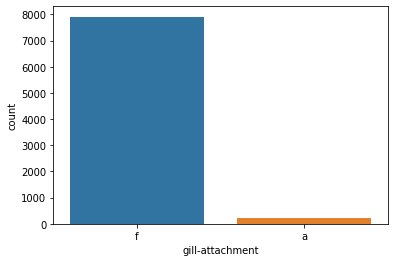

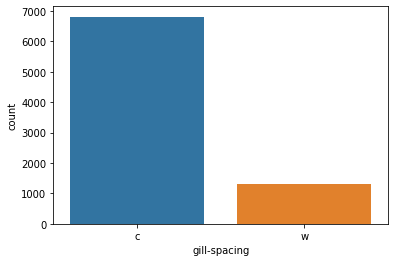

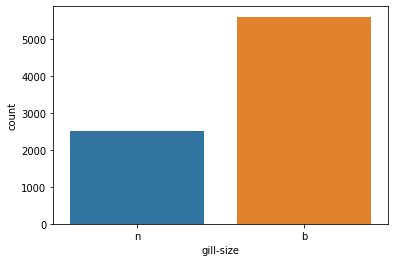

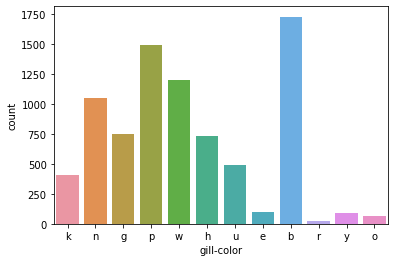

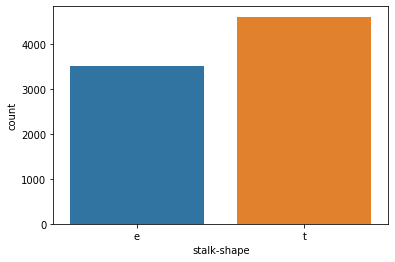

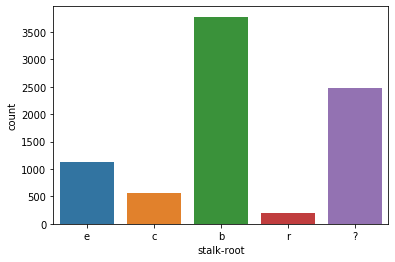

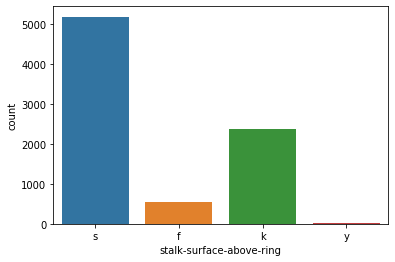

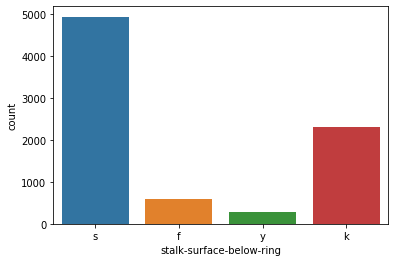

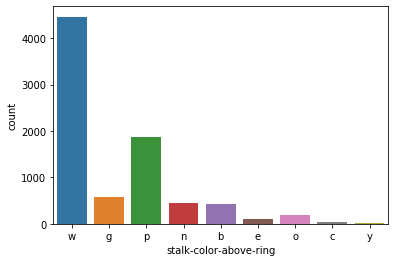

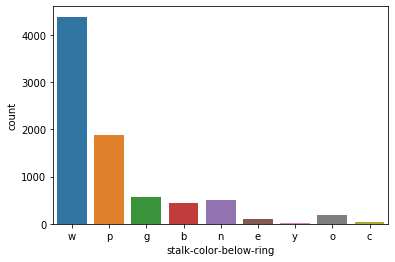

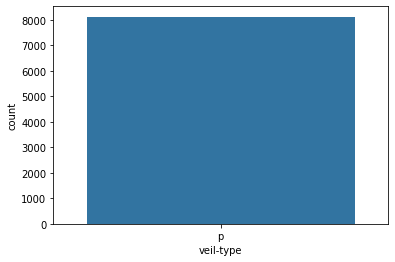

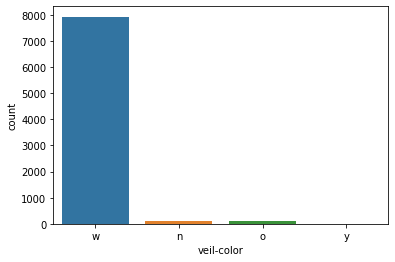

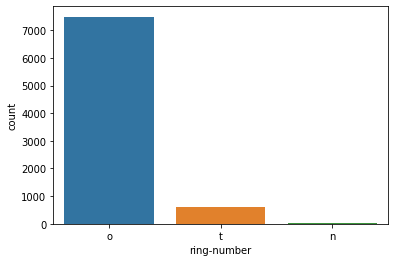

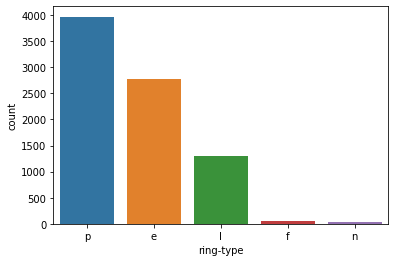

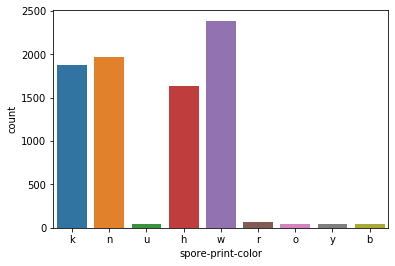

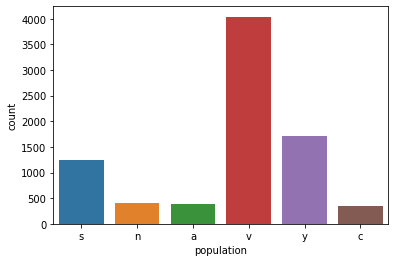

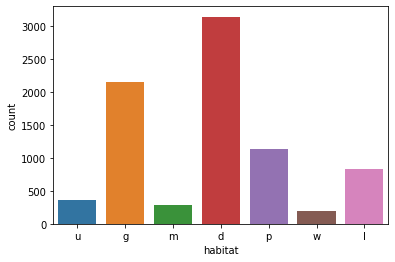

In [159]:
for col in df.columns:
    sns.countplot(x=col, data=df)
    plt.show()

Drop "veil-type" since it has only one value

In [160]:
df_veil_type = pd.DataFrame(df['veil-type'].value_counts())
df_veil_type

,veil-type
p,8124


In [161]:
df.drop('veil-type', axis=1, inplace=True)

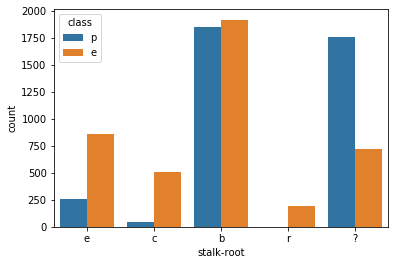

In [162]:
sns.countplot(x="stalk-root", data=df, hue = "class")
plt.show()

In [163]:
df_stalk_root_class = df[['stalk-root','class']]
df_p = df_stalk_root_class[df_stalk_root_class["class"]=='p']
df_e = df_stalk_root_class[df_stalk_root_class["class"]=='e']

df_stalk_root_p_count = pd.DataFrame(data=df_p["stalk-root"].value_counts())
df_stalk_root_p_count.reset_index(level=0, inplace=True)
df_stalk_root_p_count.rename(columns={'index':'stalk-root','stalk-root':'Count'},inplace=True)
tc_p = len(df[df['class']=='p']) - 1760
df_stalk_root_p_count["Percentage"] = df_stalk_root_p_count["Count"]*100/tc_p
df_stalk_root_p_count

df_stalk_root_e_count = pd.DataFrame(data=df_e["stalk-root"].value_counts())
df_stalk_root_e_count.reset_index(level=0, inplace=True)
df_stalk_root_e_count.rename(columns={'index':'stalk-root','stalk-root':'Count'},inplace=True)
tc_e = len(df[df['class']=='e']) - 720
df_stalk_root_e_count["Percentage"] = df_stalk_root_p_count["Count"]*100/tc_e
print(df_stalk_root_e_count)
print(df_stalk_root_p_count)

  stalk-root  Count  Percentage
0          b   1920   53.211009
1          e    864   50.458716
2          ?    720    7.339450
3          c    512    1.261468
4          r    192         NaN
  stalk-root  Count  Percentage
0          b   1856   86.085343
1          ?   1760   81.632653
2          e    256   11.873840
3          c     44    2.040816


In [164]:
df.loc[(df["stalk-root"]=='?') & (df["class"]=='e'),'stalk-root'] = "e"
df.loc[(df["stalk-root"]=='?') & (df["class"]=='p'),'stalk-root'] = "b"
df["stalk-root"].value_counts()

b    5536
e    1840
c     556
r     192
Name: stalk-root, dtype: int64

In [165]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,1,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,1,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,2,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,1,2,2,7,7,2,1,4,2,3,3


In [166]:
for col in df.columns:
    print(df[col].value_counts(),'\n\n')

0    4208
1    3916
Name: class, dtype: int64 


5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64 


3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64 


4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64 


0    4748
1    3376
Name: bruises, dtype: int64 


5    3528
2    2160
7     576
8     576
3     400
0     400
6     256
1     192
4      36
Name: odor, dtype: int64 


1    7914
0     210
Name: gill-attachment, dtype: int64 


0    6812
1    1312
Name: gill-spacing, dtype: int64 


0    5612
1    2512
Name: gill-size, dtype: int64 


0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64 


1    4608
0    3516
Name: stalk-shape, dtype: int64 


0    5536
2    1840
1     556
3     192
Name: stalk-root, dtype: int64 


2    5176
1    237

In [167]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,0.592319,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,0.914528,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,2.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


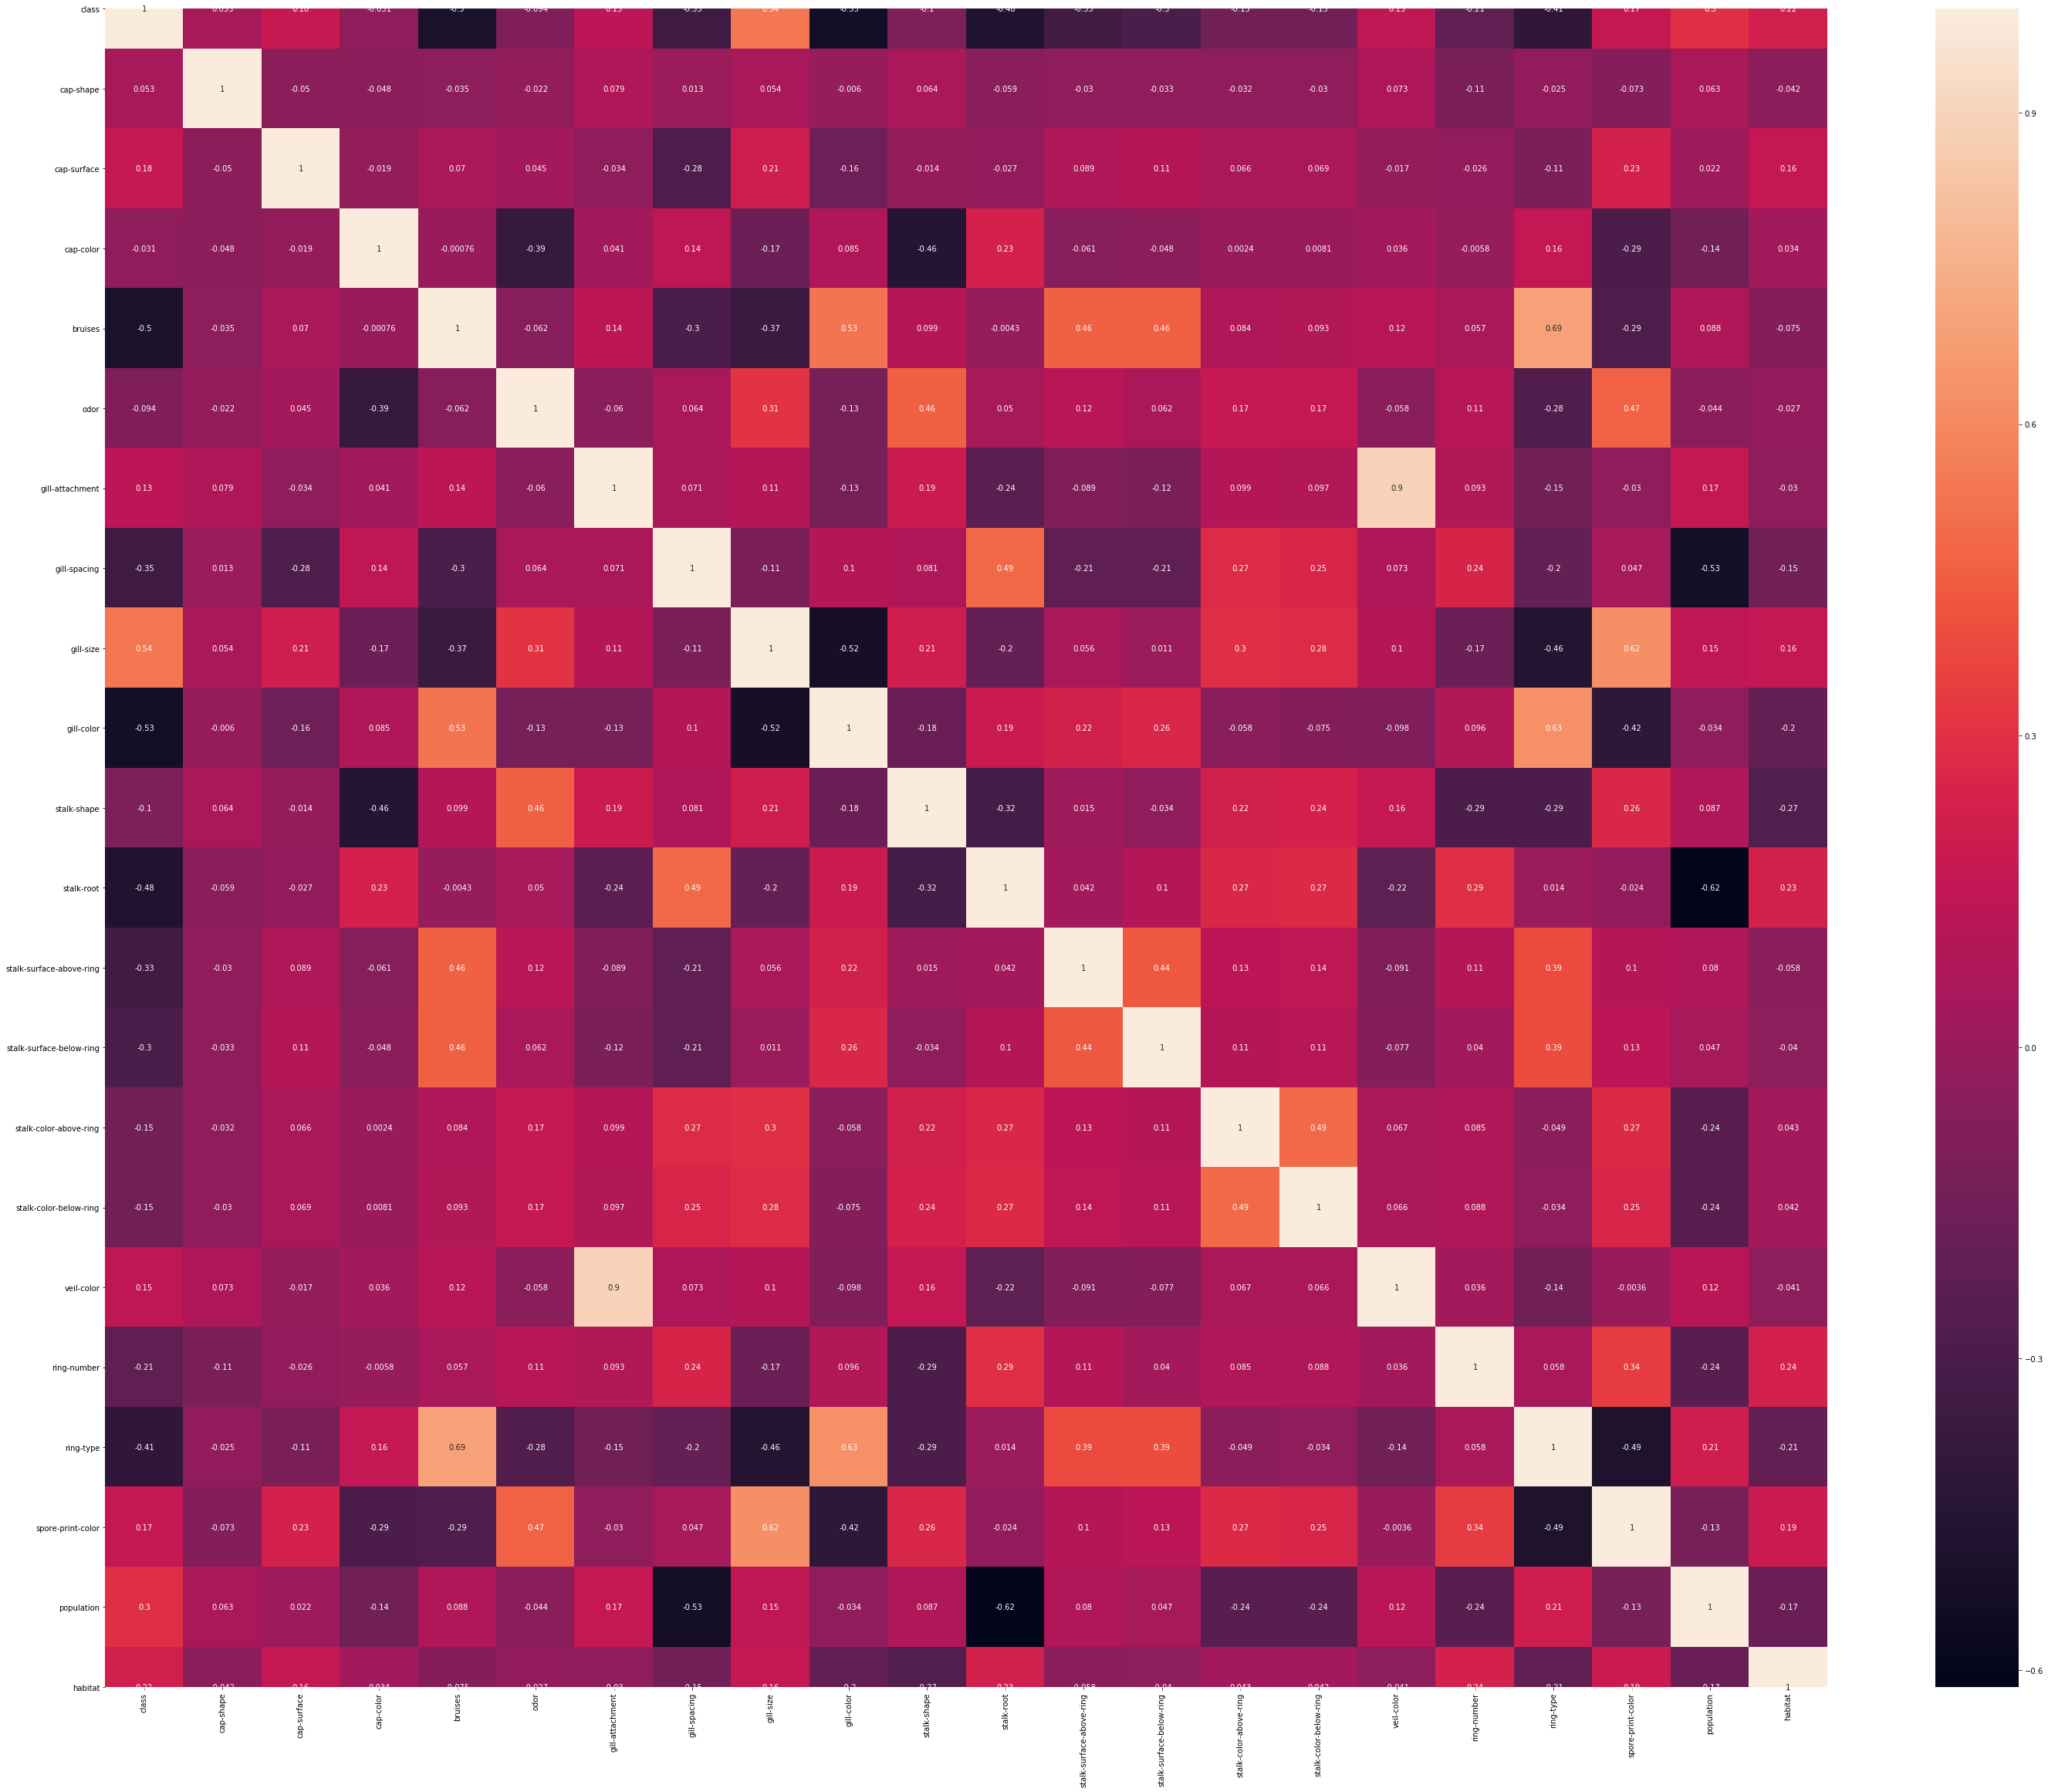

In [168]:
df_corr = df.corr()
plt.figure(figsize=(50,40))
sns.heatmap(df_corr,annot = True)

Cap-shape(0.053) and cap-colour(-0.031) have low correlation and hence can be dropped. 

In [169]:
df.drop("cap-shape",axis=1,inplace=True)
df.drop("cap-color",axis=1,inplace=True)
df.head(15)

,class,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,2,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,2,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,3,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,2,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1
5,0,3,1,0,1,0,0,5,0,1,2,2,7,7,2,1,4,2,2,1
6,0,2,1,0,1,0,0,2,0,1,2,2,7,7,2,1,4,2,2,3
7,0,3,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,3,3
8,1,3,1,6,1,0,1,7,0,2,2,2,7,7,2,1,4,2,4,1
9,0,2,1,0,1,0,0,2,0,1,2,2,7,7,2,1,4,2,3,3


In [170]:
df.shape

(8124, 20)

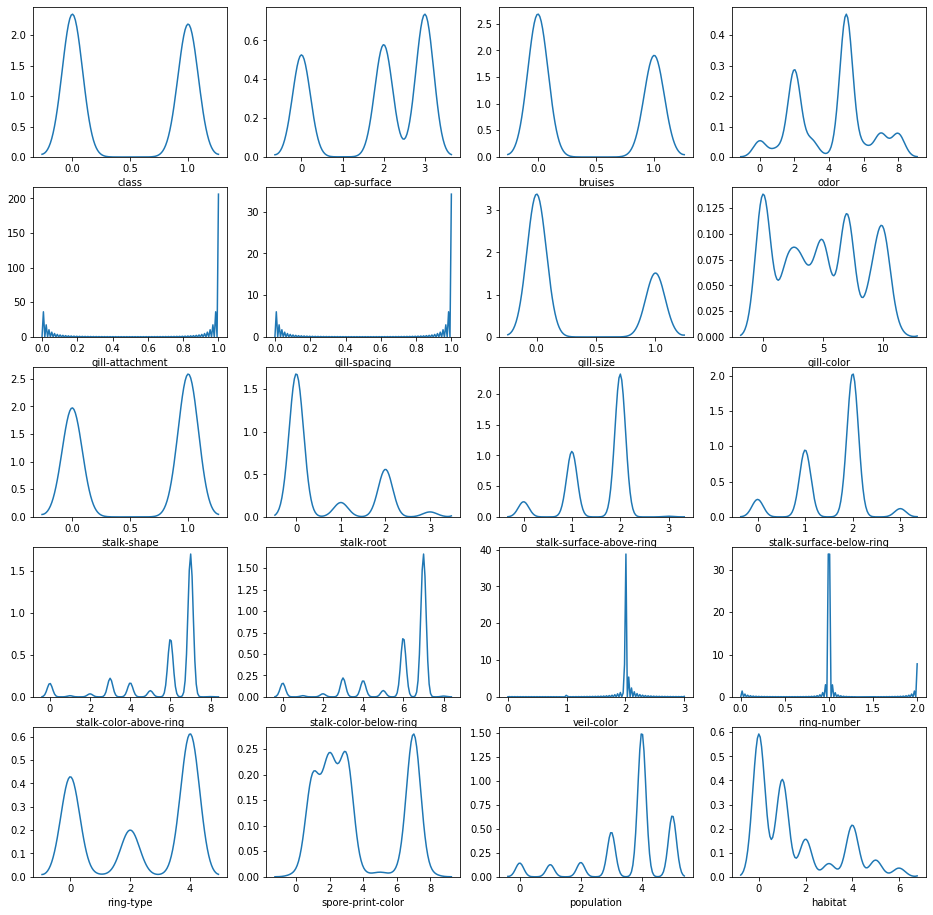

In [171]:
plt.figure(figsize=(16,16))
collist = df.columns
for i in range(20):
    plt.subplot(5,4,i+1)
    sns.distplot(df[collist[i]], hist = False)

### MODEL DEVELOPMENT

In [172]:
x = df.drop('class',axis=1)
y = df.loc[:,'class']

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.30, random_state=42)

97.09791702764919
0.9790812141099262
[[1241   16]
 [  35 1146]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1257
           1       0.99      0.97      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



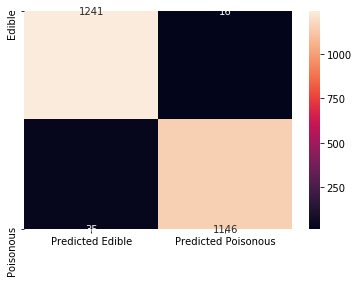

In [174]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

kfold = KFold(n_splits=10, random_state=5)
cv_results = cross_val_score(log, x_train, y_train, cv=kfold, scoring='accuracy')

print(cv_results.mean()*100)

log.fit(x_train, y_train)
pred = log.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

df_cnf_matrix = pd.DataFrame(confusion_matrix(y_test, pred),index = ['Edible', 'Poisonous'], columns = ['Predicted Edible', 'Predicted Poisonous'])
sns.heatmap(df_cnf_matrix, annot = True, fmt ='d')

100.0
1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



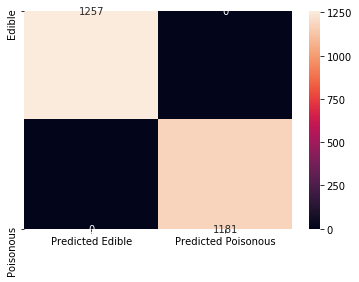

In [175]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

kfold = KFold(n_splits=10, random_state=5)
cv_results = cross_val_score(dec, x_train, y_train, cv=kfold, scoring='accuracy')

print(cv_results.mean()*100)

dec.fit(x_train, y_train)
pred = dec.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

df_cnf_matrix = pd.DataFrame(confusion_matrix(y_test, pred),index = ['Edible', 'Poisonous'], columns = ['Predicted Edible', 'Predicted Poisonous'])
sns.heatmap(df_cnf_matrix, annot = True, fmt ='d')

99.94724498131141
1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



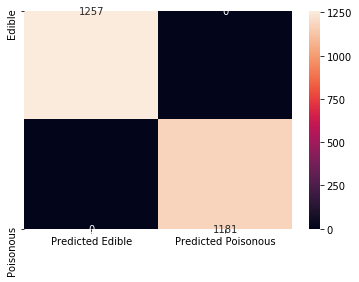

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

kfold = KFold(n_splits=10, random_state=5)
cv_results = cross_val_score(knn, x_train, y_train, cv=kfold, scoring='accuracy')

print(cv_results.mean()*100)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

df_cnf_matrix = pd.DataFrame(confusion_matrix(y_test, pred),index = ['Edible', 'Poisonous'], columns = ['Predicted Edible', 'Predicted Poisonous'])
sns.heatmap(df_cnf_matrix, annot = True, fmt ='d')

100.0
1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



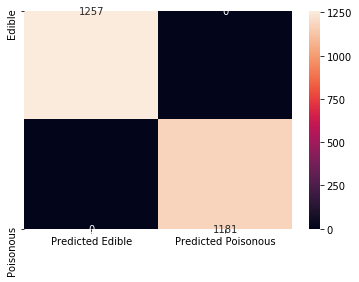

In [177]:
from sklearn.svm import SVC
svc = SVC()

kfold = KFold(n_splits=10, random_state=5)
cv_results = cross_val_score(svc, x_train, y_train, cv=kfold, scoring='accuracy')

print(cv_results.mean()*100)

svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
df_cnf_matrix = pd.DataFrame(confusion_matrix(y_test, pred),index = ['Edible', 'Poisonous'], columns = ['Predicted Edible', 'Predicted Poisonous'])
sns.heatmap(df_cnf_matrix, annot = True, fmt ='d')

89.81732221094582
0.8900738310090238
[[1119  138]
 [ 130 1051]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1257
           1       0.88      0.89      0.89      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438



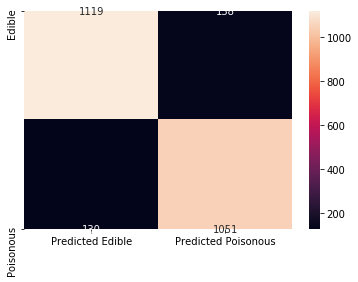

In [178]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

kfold = KFold(n_splits=10, random_state=5)
cv_results = cross_val_score(nb, x_train, y_train, cv=kfold, scoring='accuracy')

print(cv_results.mean()*100)

nb.fit(x_train, y_train)
pred = nb.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
df_cnf_matrix = pd.DataFrame(confusion_matrix(y_test, pred),index = ['Edible', 'Poisonous'], columns = ['Predicted Edible', 'Predicted Poisonous'])
sns.heatmap(df_cnf_matrix, annot = True, fmt ='d')

### SVC, KNN AND DECISION TREE GIVE 100% ACCURACY FOR SOME RANDOM STATES

In [179]:
import joblib
joblib.dump(dec,"Mushroom.pkl")

['Mushroom.pkl']